<a href="https://colab.research.google.com/github/ericmcg13/CCT-CA1/blob/main/CA1_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'Dash' is a required install for use of the plotly graphics and sliders.

'ipyleaflet' is used for the geo mapping and Choropleth layer



In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# New section

In [3]:
#!pip install dash
#!pip install ipyleaflet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Set the plot to retina quality
%config InlineBackend.figure_format = "retina"

# Set the 'talk' library in SNS (Changes the size and labels to graphs to make them bigger)
sns.set_context('talk')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_mode_interactivity = 'all'

###

# Below is only require for COLAB

###
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
migration_df = pd.read_csv("/content/drive/MyDrive/Migration.csv")
migration_df.head(5)

,Statistic,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [6]:
migration_df.shape
migration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Statistic               1890 non-null   object 
 1   Year                    1890 non-null   int64  
 2   Age Group               1890 non-null   object 
 3   Sex                     1890 non-null   object 
 4   Inward or Outward Flow  1890 non-null   object 
 5   UNIT                    1890 non-null   object 
 6   VALUE                   1575 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 103.5+ KB


In [7]:
# Remove NaN values
migration_df.dropna(inplace=True)

In [8]:
migration_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Statistic               1575 non-null   object 
 1   Year                    1575 non-null   int64  
 2   Age Group               1575 non-null   object 
 3   Sex                     1575 non-null   object 
 4   Inward or Outward Flow  1575 non-null   object 
 5   UNIT                    1575 non-null   object 
 6   VALUE                   1575 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 98.4+ KB


In [9]:
# Group the totals by age cohort
migration_sum_df = migration_df.groupby('Age Group').sum()

# Remove the TOTAL column from the graph as it distorts the figures
# migration_sum_df.drop("All ages", axis=0, inplace=True)
migration_sum_df

,Year,VALUE
Age Group,,
0 - 14 years,541530,885.9
15 - 24 years,541530,3003.2
25 - 44 years,541530,3840.5
45 - 64 years,541530,588.3
65 years and over,541530,213.2
All ages,451800,7392.7


In [10]:
# Filter the df by NET MIGRATION for ALL AGES and BOTH SEXES to get the totals
net_migration = migration_df[(migration_df['Inward or Outward Flow'] == 'Net migration') & 
                             (migration_df['Age Group'] == 'All ages') &
                             (migration_df['Sex'] == 'Both sexes')]
net_migration.head()

,Statistic,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
54,Estimated Migration (Persons in April),1988,All ages,Both sexes,Net migration,Thousand,-41.9
108,Estimated Migration (Persons in April),1989,All ages,Both sexes,Net migration,Thousand,-43.9
162,Estimated Migration (Persons in April),1990,All ages,Both sexes,Net migration,Thousand,-22.9
216,Estimated Migration (Persons in April),1991,All ages,Both sexes,Net migration,Thousand,-2.0


In [11]:
# Show the inital graph to get a sense of the pattern (if any)
fig = px.line(net_migration, x='Year', y='VALUE', color='Sex')
fig.show()

In [12]:
# Bring in the Birth/Death dataframe
bdm_df = pd.read_csv('/content/drive/MyDrive/BDM_Ireland1960_2021.csv')
bdm_df.head()

,Quarter,State,Marriages Registered (Number),"Marriage Rate Registered per 1,000 Estimated Population (Number)",Deaths Registered (Number),"Death Rate Registered per 1,000 Estimated Population (Number)","Deaths of Infants under 1 Year Registered per 1,000 Births (Number)",Births Registered (Number),"Birth Rate Registered per 1,000 Estimated Population (Number)"
0,1960Q1,Ireland,2987,4.2,9399,13.3,34.7,14614,20.6
1,1960Q2,Ireland,3501,4.9,7882,11.1,26.8,16494,23.1
2,1960Q3,Ireland,5900,8.3,6950,9.8,26.3,15612,22.2
3,1960Q4,Ireland,3106,4.4,8427,11.7,29.7,14010,19.8
4,1961Q1,Ireland,2179,3.1,11883,17.1,34.9,14692,20.8


In [13]:
bdm_df.info()
bdm_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Quarter                                                              245 non-null    object 
 1   State                                                                245 non-null    object 
 2   Marriages Registered (Number)                                        245 non-null    int64  
 3   Marriage Rate Registered per 1,000 Estimated Population (Number)     245 non-null    float64
 4   Deaths Registered (Number)                                           245 non-null    int64  
 5   Death Rate Registered per 1,000 Estimated Population (Number)        245 non-null    float64
 6   Deaths of Infants under 1 Year Registered per 1,000 Births (Number)  245 non-null    float64
 7   Births Re

(245, 9)

In [14]:
# Computer the net delta population growth (birth - death)
bdm_df['Growth'] = bdm_df['Births Registered (Number)'] - bdm_df['Deaths Registered (Number)']

# Use Lambda to iterate over the values in each cell to remove the QUARTER time values.
bdm_df['Quarter'] = bdm_df['Quarter'].map(lambda x: str(x)[:-2])

In [15]:
bdm_df.head()

,Quarter,State,Marriages Registered (Number),"Marriage Rate Registered per 1,000 Estimated Population (Number)",Deaths Registered (Number),"Death Rate Registered per 1,000 Estimated Population (Number)","Deaths of Infants under 1 Year Registered per 1,000 Births (Number)",Births Registered (Number),"Birth Rate Registered per 1,000 Estimated Population (Number)",Growth
0,1960,Ireland,2987,4.2,9399,13.3,34.7,14614,20.6,5215
1,1960,Ireland,3501,4.9,7882,11.1,26.8,16494,23.1,8612
2,1960,Ireland,5900,8.3,6950,9.8,26.3,15612,22.2,8662
3,1960,Ireland,3106,4.4,8427,11.7,29.7,14010,19.8,5583
4,1961,Ireland,2179,3.1,11883,17.1,34.9,14692,20.8,2809


In [16]:
# We only need the time and growth delta for graphing
growth = bdm_df[['Quarter', 'Growth']].copy()
growth = growth.groupby(['Quarter'], as_index=False)['Growth'].sum()

# Quarter has been removed, only YEAR remains
growth.columns = ['Year', 'Growth Delta']
growth.head()

,Year,Growth Delta
0,1960,28072
1,1961,25278
2,1962,27968
3,1963,29408
4,1964,31535


In [17]:
# drop years less than 1987 for comparison with Growth
compare_growth = growth[growth['Year'] > '1986']

fig1 = px.line(compare_growth, x='Year', y='Growth Delta')
fig1.show()

In [18]:
# We only need the Year and migration totals for graphing
migration_df_simplified = net_migration[['Year', 'VALUE']].copy()

# Convert STRING year in compare_growth to INT so that a JOIN can be performed
compare_growth['Year'] = pd.to_numeric(compare_growth['Year'])

# Join Columns
merge_df = pd.merge(compare_growth, migration_df_simplified, how='outer', on='Year')

# Fix VALUE column name and add
merge_df.rename({'VALUE':'Migration Delta'}, axis=1, inplace=True)
merge_df['Migration Delta'] = merge_df['Migration Delta'].apply(lambda x: int(x * 1000))
merge_df.head()

,Year,Growth Delta,Migration Delta
0,1987,27645,-23000
1,1988,22725,-41900
2,1989,20556,-43900
3,1990,21136,-22900
4,1991,21192,-2000


In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig2 = make_subplots(specs=[[{"secondary_y": True}]])

# Add trace - Growth
fig2.add_trace(
    go.Scatter(x=merge_df['Year'], y=merge_df['Growth Delta'], name="Growth"),
    secondary_y=False,
)

# Add trace - Migration
fig2.add_trace(
    go.Scatter(x=merge_df['Year'], y=merge_df['Migration Delta'], name="Migration"),
    secondary_y=False,
)

# Add figure title
fig2.update_layout(
    title_text="Pop Growth and Migration"
)

# Set x-axis title
fig2.update_xaxes(title_text="Year")

# Set y-axes titles
fig2.update_yaxes(title_text="Population", secondary_y=False)
fig2.show()

In [20]:
# Import the employment data
employment_df = pd.read_csv('/content/drive/MyDrive/Vacancies.csv')
employment_df.head()

,Statistic,Quarter,Economic Sector NACE Rev 2,Private or Public Sector,UNIT,VALUE
0,Employment,2008Q1,All NACE economic sectors,Private sector,Number,1350200.0
1,Employment,2008Q1,All NACE economic sectors,Public sector,Number,417000.0
2,Employment,2008Q1,All NACE economic sectors,All sectors,Number,1767200.0
3,Employment,2008Q1,Construction (F),Private sector,Number,NaN
4,Employment,2008Q1,Construction (F),Public sector,Number,NaN


In [21]:
employment_df.info()
employment_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804 entries, 0 to 6803
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Statistic                   6804 non-null   object 
 1   Quarter                     6804 non-null   object 
 2   Economic Sector NACE Rev 2  6804 non-null   object 
 3   Private or Public Sector    6804 non-null   object 
 4   UNIT                        6804 non-null   object 
 5   VALUE                       2560 non-null   float64
dtypes: float64(1), object(5)
memory usage: 319.1+ KB


(6804, 6)

In [22]:
employment_df['Statistic'].unique()

array(['Employment', 'Number of Job Vacancies', 'Job Vacancies'],
      dtype=object)

In [23]:
# We need the total number of vacancies for all sectors in all industries to get the totals
employment_df = employment_df[(employment_df['Statistic'] == 'Number of Job Vacancies') &
                             (employment_df['Private or Public Sector'] == 'All sectors') &
                             (employment_df['Economic Sector NACE Rev 2'] == 'All NACE economic sectors')] 

employment_df.head()

,Statistic,Quarter,Economic Sector NACE Rev 2,Private or Public Sector,UNIT,VALUE
2270,Number of Job Vacancies,2008Q1,All NACE economic sectors,All sectors,Number,17900.0
2312,Number of Job Vacancies,2008Q2,All NACE economic sectors,All sectors,Number,15500.0
2354,Number of Job Vacancies,2008Q3,All NACE economic sectors,All sectors,Number,12500.0
2396,Number of Job Vacancies,2008Q4,All NACE economic sectors,All sectors,Number,7700.0
2438,Number of Job Vacancies,2009Q1,All NACE economic sectors,All sectors,Number,7000.0


In [24]:
# Use Lambda to iterate over the values in each cell and remove QUARTER time data
employment_df['Quarter'] = employment_df['Quarter'].map(lambda x: str(x)[:-2])

# We only need the year and total vacancies for graphing
vacancies_df = employment_df[['Quarter', 'VALUE']].copy()
vacancies_df = vacancies_df.groupby(['Quarter'], as_index=False)['VALUE'].sum()

# Quarter has been removed, rename to year time frame
vacancies_df.columns = ['Year', 'Open Vacancies']
vacancies_df.head()

,Year,Open Vacancies
0,2008,53600.0
1,2009,23100.0
2,2010,29300.0
3,2011,32100.0
4,2012,35500.0


In [25]:
# Add the job vacancies data to the already created graph with the growth and pop data
fig2.add_trace(
    go.Scatter(x=vacancies_df['Year'], y=vacancies_df['Open Vacancies'], name="Open Vacancies"),
    secondary_y=False,
)
fig2.show()

In [26]:
# Prepare the merge df to add the job vacancies data (only 2008 onwards is available in vacancies)
merge_df = merge_df[merge_df['Year'] >= 2008]

# Cast the Year columns as a Int for merge
vacancies_df['Year'] = pd.to_numeric(vacancies_df['Year'])

# Add the vacancies df with merge
merge_df = pd.merge(merge_df, vacancies_df, how='outer', on='Year')
merge_df

,Year,Growth Delta,Migration Delta,Open Vacancies
0,2008,47509,64300,53600.0
1,2009,46030,1600,23100.0
2,2010,47411,-27500,29300.0
3,2011,45655,-27400,32100.0
4,2012,43377,-25700,35500.0
5,2013,38912,-18700,42100.0
6,2014,38337,-8500,46100.0
7,2015,35957,5900,62100.0
8,2016,33507,16200,66600.0
9,2017,31569,19800,73500.0


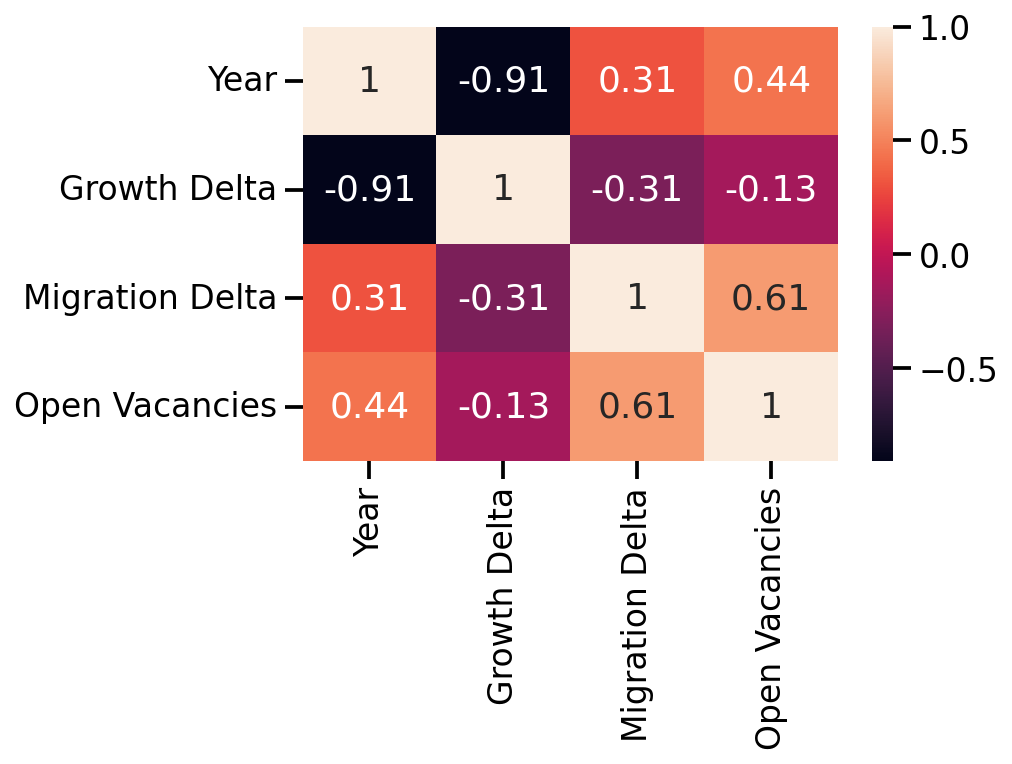

In [27]:
# Appears to be a corr. between migration and job vacancies on the graph - is this true?
corrMatrix = merge_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [29]:
# Install the PROPHET dependancies for future series forcasting
#!pip install pystan
#!pip install fbprophet

In [30]:
from fbprophet import Prophet

In [31]:
# Documentation shows that the time series data must be in DATETIME format. I will convert that here.
merge_df['Year'] = pd.to_datetime(merge_df['Year'], format='%Y')
merge_df.head()

,Year,Growth Delta,Migration Delta,Open Vacancies
0,2008-01-01,47509,64300,53600.0
1,2009-01-01,46030,1600,23100.0
2,2010-01-01,47411,-27500,29300.0
3,2011-01-01,45655,-27400,32100.0
4,2012-01-01,43377,-25700,35500.0


In [32]:
# The PROPHET documentation shows that the DF needs to only have 2 columns named ['ds' and 'y']
prophet_df = merge_df.drop(['Migration Delta', 'Open Vacancies'], axis=1)
prophet_df.columns = ['ds', 'y']
prophet_df.head()

,ds,y
0,2008-01-01,47509
1,2009-01-01,46030
2,2010-01-01,47411
3,2011-01-01,45655
4,2012-01-01,43377


In [33]:
# We will use 0.95 to support the standard of a 5% P-Value
m = Prophet(interval_width=0.95)

# Train the model
model = m.fit(prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


In [34]:
future = m.make_future_dataframe(periods=10, freq='Y')
forcast = m.predict(future)
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,-24627.854411,45415.830778,62156.044194,-24627.854411,-24627.854411,78254.677708,78254.677708,78254.677708,78254.677708,78254.677708,78254.677708,0.0,0.0,0.0,53626.823297
1,2009-01-01,-27150.890444,38895.683546,54899.469205,-27150.890444,-27150.890444,74007.936524,74007.936524,74007.936524,74007.936524,74007.936524,74007.936524,0.0,0.0,0.0,46857.046081
2,2010-01-01,-29667.032916,38728.732052,53995.440670,-29667.032916,-29667.032916,76008.666852,76008.666852,76008.666852,76008.666852,76008.666852,76008.666852,0.0,0.0,0.0,46341.633936
3,2011-01-01,-32183.175431,37520.814217,53829.218536,-32183.175431,-32183.175431,77424.818716,77424.818716,77424.818716,77424.818716,77424.818716,77424.818716,0.0,0.0,0.0,45241.643286
4,2012-01-01,-34699.317919,35042.709845,51268.075221,-34699.317919,-34699.317919,78254.677708,78254.677708,78254.677708,78254.677708,78254.677708,78254.677708,0.0,0.0,0.0,43555.359789


In [35]:
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
19,2026-12-31,-72462.139274,-2816.744456,13259.293311,-72462.140899,-72462.137707,77224.423578,77224.423578,77224.423578,77224.423578,77224.423578,77224.423578,0.0,0.0,0.0,4762.284304
20,2027-12-31,-74978.282057,-7721.492320,8638.540879,-74978.284077,-74978.280203,75712.058303,75712.058303,75712.058303,75712.058303,75712.058303,75712.058303,0.0,0.0,0.0,733.776246
21,2028-12-31,-77501.318382,-7056.244172,9005.568699,-77501.320881,-77501.316150,78497.533896,78497.533896,78497.533896,78497.533896,78497.533896,78497.533896,0.0,0.0,0.0,996.215514
22,2029-12-31,-80017.461165,-10130.177828,6228.202147,-80017.464147,-80017.458472,78153.682616,78153.682616,78153.682616,78153.682616,78153.682616,78153.682616,0.0,0.0,0.0,-1863.778549
23,2030-12-31,-82533.603947,-13764.924842,3012.553686,-82533.607413,-82533.600838,77224.423578,77224.423578,77224.423578,77224.423578,77224.423578,77224.423578,0.0,0.0,0.0,-5309.180369


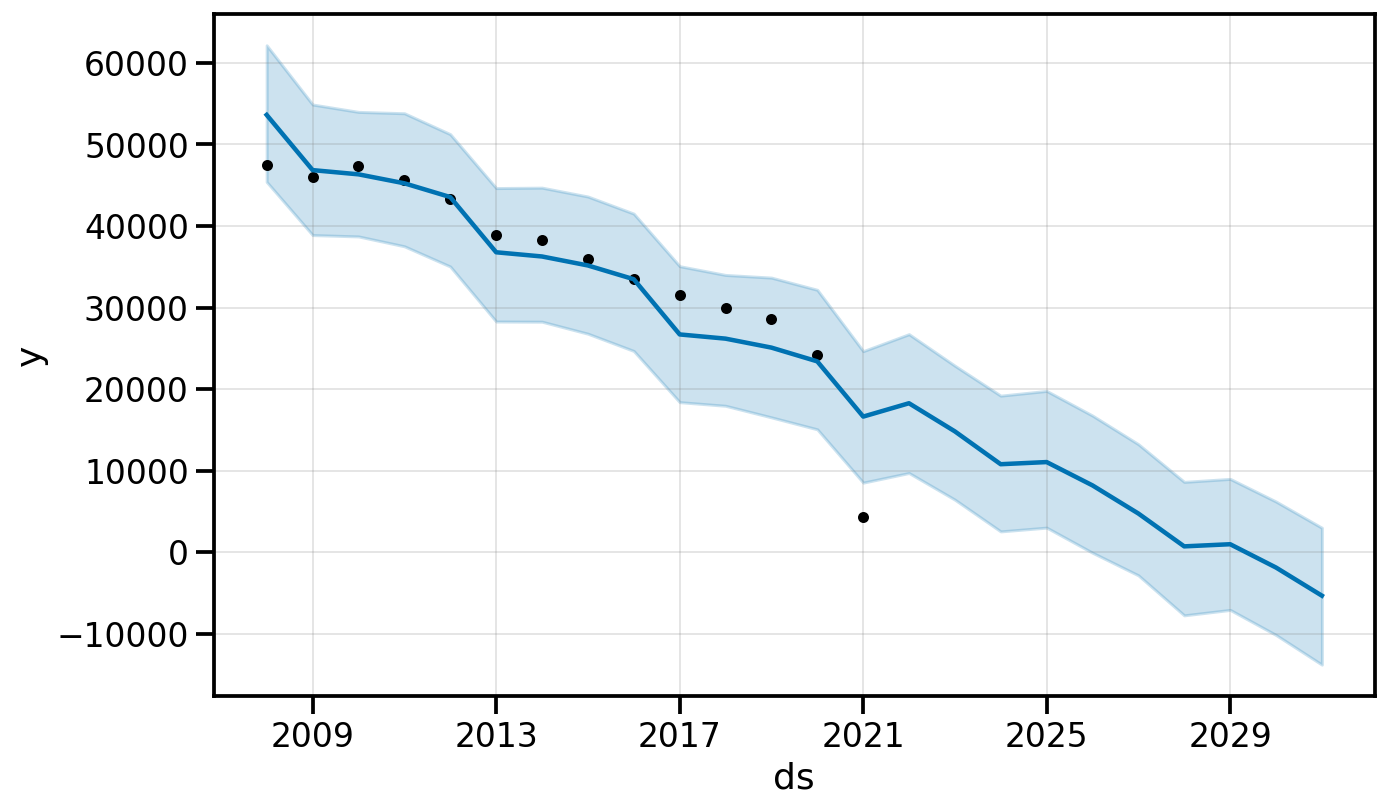

In [36]:
fig4 = m.plot(forcast)

The forecasting chart above shows that if the population trend continues on its current trajectory, we could expect to see natural population growth to go negative, shortly after 2029. This means that Ireland is going to increasingly rely on immigration in order to support its economy. This will have a big effect on pension payments, tax collection, etc.

In [37]:
births_df = pd.read_csv("/content/drive/MyDrive/BirthsByCounty1985_2020.csv")
births_df.head()

,Year,County,All Births (Number),First Births (Number),Births within Marriage (Number),Births outside Marriage (Number),Average Age of Mother (Years),Average Age of First Time Mother (Years)
0,1985,ROI Total,62388.0,NaN,57106.0,5282.0,29.3,26.0
1,1985,Dublin City,6645.0,NaN,5132.0,1513.0,28.0,NaN
2,1985,Fingal,NaN,NaN,NaN,NaN,NaN,NaN
3,1985,Dun Laoghaire Rathdown,878.0,NaN,754.0,124.0,29.8,NaN
4,1985,South Dublin,10123.0,NaN,9280.0,843.0,29.3,NaN


In [38]:
births_df['County'].unique()

array(['ROI Total', 'Dublin City', 'Fingal', 'Dun Laoghaire Rathdown',
       'South Dublin', 'Wicklow', 'Carlow', 'Kildare', 'Kilkenny',
       'Laois', 'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath',
       'Wexford', 'Waterford County', 'Waterford City', 'Clare',
       'Cork City', 'Cork County', 'Kerry', 'Limerick City',
       'Limerick County', 'North Tipperary', 'South Tipperary',
       'Tipperary', 'Galway City', 'Leitrim', 'Mayo', 'Roscommon',
       'Sligo', 'Galway County', 'Cavan', 'Donegal', 'Monaghan',
       'Outside the ROI Total'], dtype=object)

In [138]:
# This function will tidy up the county names based on the available values in the original file
# It should remove all the duplication 'city' classifications and roll the 
def county_mapping(county):
  if 'Dublin' in county or 'Fingal' in county or 'Laoghaire' in county:
    return 'Dublin'
  elif 'Cork' in county:
    return 'Cork'
  elif 'Galway' in county:
    return 'Galway'
  elif 'Limerick' in county:
    return 'Limerick'
  elif 'Tipperary' in county:
    return 'Tipperary'
  elif 'Waterford' in county:
    return 'Waterford'
  else:
    return county

In [139]:
# Remove any missing values from the All Births (Number)
births_df.dropna(axis=0, how='any', subset=['All Births (Number)'], inplace=True)
births_df.head()

,Year,County,All Births (Number),First Births (Number),Births within Marriage (Number),Births outside Marriage (Number),Average Age of Mother (Years),Average Age of First Time Mother (Years),Current_County
1,1985,Dublin City,6645.0,NaN,5132.0,1513.0,28.0,NaN,Dublin
3,1985,Dun Laoghaire Rathdown,878.0,NaN,754.0,124.0,29.8,NaN,Dublin
4,1985,South Dublin,10123.0,NaN,9280.0,843.0,29.3,NaN,Dublin
5,1985,Wicklow,1829.0,NaN,1634.0,195.0,28.9,NaN,Wicklow
6,1985,Carlow,832.0,NaN,773.0,59.0,28.8,NaN,Carlow


In [140]:
# We need to clean up the COUNTY column to match values that are inline with the currenty county structure in Ireland
# We can start by dropping the ROI totals
births_df = births_df[births_df.County != 'ROI Total']

# We can use lambda to go through each cell in COUNTY to map to the new county name
births_df['Current_County'] = births_df['County'].apply(lambda x: county_mapping(str(x)))
births_df.head()

,Year,County,All Births (Number),First Births (Number),Births within Marriage (Number),Births outside Marriage (Number),Average Age of Mother (Years),Average Age of First Time Mother (Years),Current_County
1,1985,Dublin City,6645.0,NaN,5132.0,1513.0,28.0,NaN,Dublin
3,1985,Dun Laoghaire Rathdown,878.0,NaN,754.0,124.0,29.8,NaN,Dublin
4,1985,South Dublin,10123.0,NaN,9280.0,843.0,29.3,NaN,Dublin
5,1985,Wicklow,1829.0,NaN,1634.0,195.0,28.9,NaN,Wicklow
6,1985,Carlow,832.0,NaN,773.0,59.0,28.8,NaN,Carlow


In [131]:
# Time to map map the county data
#!pip install ipyleaflet
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles

# Below block is only required to display code within Colab
# from google.colab import output
# output.enable_custom_widget_manager()

# Create the map aspects.
center = [53.128, -7.5]
zoom = 6

# Create a map with the defined aspects.
m = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)
m

Map(center=[53.128, -7.5], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [92]:
# The map data needs to be read in as a JSON file to work with the GeoJSON library
import json
map_json = pd.read_json('/content/drive/MyDrive/Ireland.json')

with open('/content/drive/MyDrive/Ireland.json') as json_file:
    map_data = json.load(json_file)

In [93]:
# Here we need to create a function that will output a dictionary with the float density values for 
# each county by year with the Births dataframe

def births_density(year):
  try:
    # This sexy line will create a new DataFrame by:
    # 1 filtering the births_df by year
    # 2 group the counties together (when we cleaned up the city values it created some duplicate counties)
    # 3 combine the duplicate counties and sum the total ALL BIRTHS
    selected_year_df = births_df[births_df['Year'] == year].groupby(['Current_County'], as_index=False)['All Births (Number)'].sum()
    
    # Create the necessary columns in a list object and return them smashed together in a dict
    return dict(zip(selected_year_df['Current_County'].tolist(), 
                    selected_year_df['All Births (Number)'].tolist()))
  except:
    return print("Unable to derive the correct YEAR and create a dict from values")


{'Carlow': 706.0, 'Cavan': 714.0, 'Clare': 1372.0, 'Cork': 6064.0, 'Donegal': 1772.0, 'Dublin': 16392.0, 'Galway': 2780.0, 'Kerry': 1594.0, 'Kildare': 2881.0, 'Kilkenny': 1047.0, 'Laois': 782.0, 'Leitrim': 295.0, 'Limerick': 2406.0, 'Longford': 441.0, 'Louth': 1535.0, 'Mayo': 1438.0, 'Meath': 1921.0, 'Monaghan': 627.0, 'Offaly': 815.0, 'Roscommon': 500.0, 'Sligo': 734.0, 'Tipperary': 1993.0, 'Waterford': 1423.0, 'Westmeath': 1117.0, 'Wexford': 1616.0, 'Wicklow': 1824.0}


In [94]:
# # Create the Choropleth to add the shading over the counties
# import ipyleaflet

# # Test
# x = births_density(2000)
# print(x)

# layer = ipyleaflet.Choropleth(
#     geo_data=map_data,
#     choro_data=x
#     )

In [132]:
# Map with sliders
from ipyleaflet import WidgetControl
import ipywidgets as widgets

min_year = 1985
max_year = 2020

year_slider = widgets.IntSlider(description='Year:', min=min_year, max=max_year, value=min_year)

# Add the inital layer
layer = ipyleaflet.Choropleth(
    geo_data=map_data,
    choro_data=births_density(min_year),
    style={'fillOpacity': 0.9}
    )

def slider_changed_year(change):
  # Remove the last layer (remove_all would also remove the base map layer, we dont want that)
  if m.layers[1] != None:
    m.remove_layer(m.layers[1])
  
  # Grab the year that the slider stopped on and create a new choropleth layer
  layer = births_density(year_slider.value)
  m.add_layer(ipyleaflet.Choropleth(geo_data=map_data, 
                                    choro_data=layer, 
                                    style={'fillOpacity': 0.9}))

# Add the slider to the widget control and add an observe to check to see if the slider has updated (then refresh the map)
widget_control = WidgetControl(widget=year_slider, position='topright')
m.add_control(widget_control)
m.add_layer(layer)
year_slider.observe(slider_changed_year)

# Display the inital map
m

Map(bottom=5527.0, center=[53.128, -7.5], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_…

In [144]:
# Group the births by county and year
all_years_births = births_df.groupby(['Current_County', 'Year'], as_index=False)['All Births (Number)'].sum()

# Add the figure with the ALL_BIRTHS totals by county by year
fig5 = px.line(all_years_births, x='Year', y='All Births (Number)', color="Current_County")
fig5.show()